# Introduction aux Series temporelles

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


# Nettoyage des données

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,144,144,1956-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Passengers,144,NaN,NaN,NaN,280.299,119.966,104,180,265.5,360.5,622


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df[df.isna().any(axis=1)]

,Month,#Passengers


In [6]:
df=df.dropna()

In [7]:
df[df.isna().any(axis=1)]

,Month,#Passengers


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df.rename(columns = {'#Passengers':'passagers','Month':'date'}, inplace = True)

In [10]:
df

,date,passagers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [11]:
df['date'] = pd.to_datetime(df['date']) # convert date column to DateTime
# data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       144 non-null    datetime64[ns]
 1   passagers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


# Visualiser les données

<AxesSubplot:xlabel='date'>

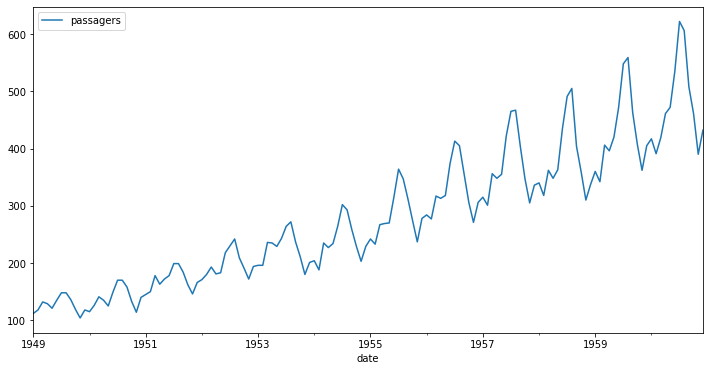

In [12]:
df.plot(x='date', y='passagers', figsize=(12,6))

In [13]:
df.set_index('date', inplace=True)

In [14]:
df

,passagers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [18]:
df.loc['1949']

,passagers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


<AxesSubplot:xlabel='date'>

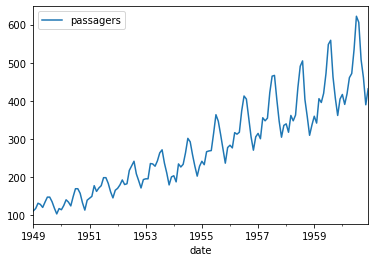

In [19]:
#Month wise
df.resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

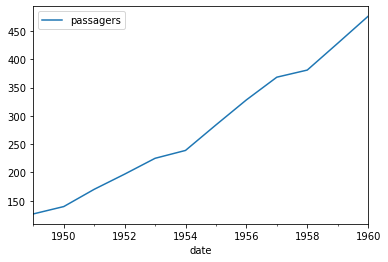

In [20]:
#Week wise - just to change it to W(Week)
df.resample('Y').mean().plot()

# Saisonnabilité

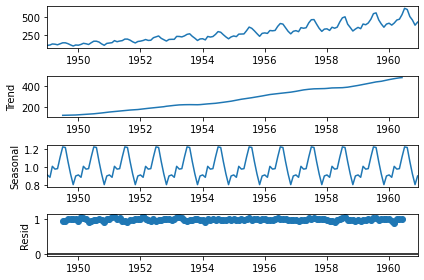

In [21]:
analysis = df[['passagers']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

# Moyenne mobile

In [25]:
# moving average

df['passagers_ma'] = df['passagers'].rolling(window=30).mean()
df.head(10)

,passagers,passagers_ma
date,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


<AxesSubplot:xlabel='date'>

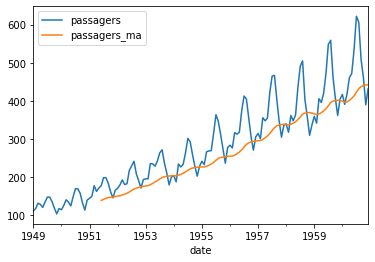

In [26]:
df.resample('M').mean().plot()